In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r"C:\Users\ARHAM SHAHID\Desktop\Projects\Correlation in Python\movies[1].csv")

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
missing_data = df.isnull().sum()
missing_data

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# Dealing with missing values and converting datatype as required
df['gross'] = df['gross'].fillna(0)
df['budget'] = df['budget'].fillna(0)

# Convert the columns from float64 to int64
df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')


In [6]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [7]:
df[df['score'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000,0,Dow Jazz Films,121.0
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000,0,NaN,90.0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [8]:
df.isna().sum()

name         0
rating      77
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [9]:
# Remove Extra Information Using Regex

df['released'] = df['released'].replace(r"\s\([^)]*\)", "", regex=True)

# Convert to datetime format
df['released'] = pd.to_datetime(df['released'], format='%B %d, %Y', errors='coerce')

# Check the result
print(df['released'].head())

0   1980-06-13
1   1980-07-02
2   1980-06-20
3   1980-07-02
4   1980-07-25
Name: released, dtype: datetime64[ns]


In [10]:
# Correcting the year that may contain error(s)
df['yearcorrect'] = df['released'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [31]:
df.sort_values(by = ['gross'], inplace = False, ascending = False).head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,2019-07-19,6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,2015-06-12,7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,2012-05-04,8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
6646,Furious 7,PG-13,Action,2015,2015-04-03,7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,2015
7494,Frozen II,PG,Animation,2019,2019-11-22,6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,2019


In [12]:
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [13]:
pd.reset_option('display.max_rows')


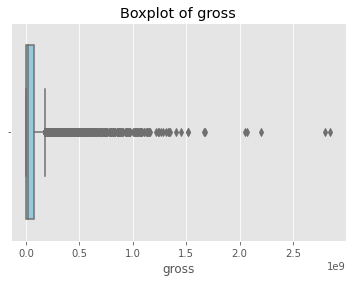

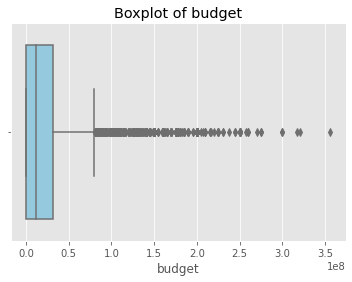

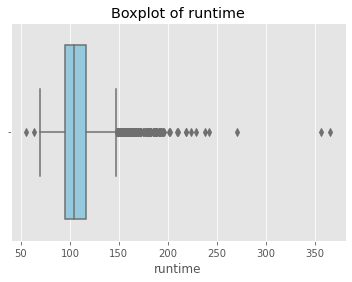

In [14]:
# detect the outliers 
numeric_columns = ['gross', 'budget', 'runtime']


for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [15]:
#to list outliers of gross 
Q1 = df['gross'].quantile(0.25)
Q3 = df['gross'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['gross'] < lower_bound) | (df['gross'] > upper_bound)]
print(outliers)

                                                name     rating      genre  \
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
92     Indiana Jones and the Raiders of the Lost Ark         PG     Action   
209                       E.T. the Extra-Terrestrial         PG     Family   
221                                          Tootsie         PG     Comedy   
333       Star Wars: Episode VI - Return of the Jedi         PG     Action   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   
7655                           Legend of Deification      TV-PG  Animation   

      year   released  score      votes          director      

In [16]:
#to list outliers of budget 
Q1 = df['budget'].quantile(0.25)
Q3 = df['budget'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['budget'] < lower_bound) | (df['budget'] > upper_bound)]
print(outliers)

                            name rating      genre  year   released  score  \
1843  Terminator 2: Judgment Day      R     Action  1991 1991-07-03    8.5   
2262            Last Action Hero  PG-13     Action  1993 1993-06-18    6.4   
2447                   True Lies      R     Action  1994 1994-07-15    7.2   
2652              Batman Forever  PG-13     Action  1995 1995-06-16    5.4   
2656   Die Hard with a Vengeance      R     Action  1995 1995-05-19    7.6   
...                          ...    ...        ...   ...        ...    ...   
7645               Birds of Prey      R     Action  2020 2020-02-07    6.1   
7648           Bad Boys for Life      R     Action  2020 2020-01-17    6.6   
7649          Sonic the Hedgehog     PG     Action  2020 2020-02-14    6.5   
7650                    Dolittle     PG  Adventure  2020 2020-01-17    5.6   
7651        The Call of the Wild     PG  Adventure  2020 2020-02-21    6.8   

          votes         director              writer           

In [17]:
#to list outliers of runtime 
Q1 = df['runtime'].quantile(0.25)
Q3 = df['runtime'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['runtime'] < lower_bound) | (df['runtime'] > upper_bound)]
print(outliers)

                                  name     rating      genre  year   released  \
21                       Heaven's Gate          R  Adventure  1980 1981-04-24   
49                  Lion of the Desert         PG  Biography  1980 1981-05-16   
66    Moscow Does Not Believe in Tears         PG     Comedy  1980 1980-02-11   
102                           Das Boot        NaN  Adventure  1981 1982-02-10   
115                               Reds         PG  Biography  1981 1981-12-25   
...                                ...        ...        ...   ...        ...   
7613          42nd Street: The Musical  Not Rated    Musical  2019 2019-05-01   
7634             My People, My Country        NaN      Drama  2019 2019-10-01   
7643                             Tenet      PG-13     Action  2020 2020-09-03   
7644                 Wonder Woman 1984      PG-13     Action  2020 2020-12-25   
7652                 The Eight Hundred  Not Rated     Action  2020 2020-08-28   

      score     votes      

# Exploratory Data Analysis and Correlation

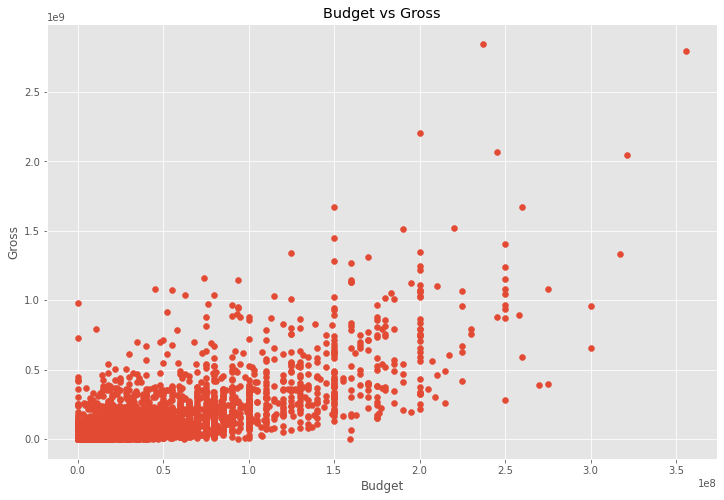

In [18]:
# scatter plot for budger vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross')
plt.ylabel('Gross')
plt.xlabel('Budget')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

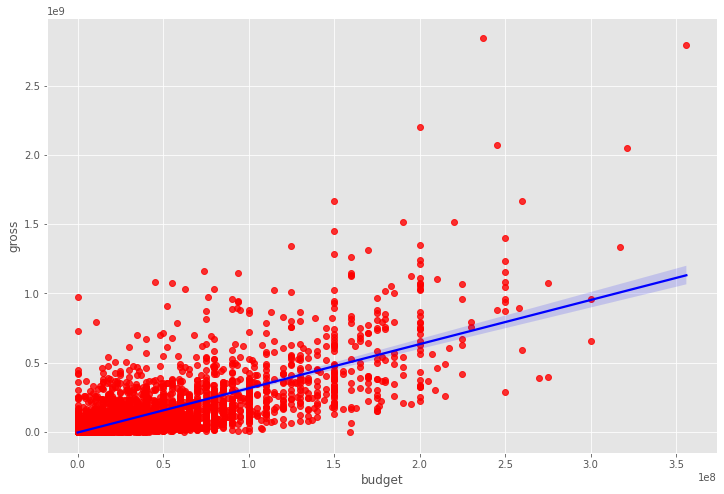

In [19]:
# Regression plot

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [20]:
# Correlation

df.corr(method = 'pearson') # default is pearson but kendall and spearman also exist

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [21]:
# High correlation between budget and gross

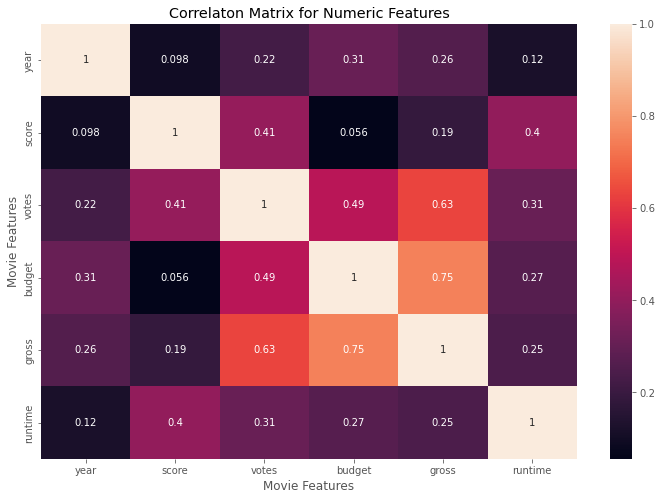

In [22]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlaton Matrix for Numeric Features')

plt.ylabel('Movie Features')

plt.xlabel('Movie Features')

plt.show()

In [23]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
                
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1980-06-13,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,5573,6,1,1980,1980-07-02,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5142,4,0,1980,1980-06-20,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,1980,1980-07-02,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,1980,1980-07-25,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2020-10-23,3.1,18.0,1500,2289,2421,55,7000,0,-1,90.0,40
7664,1678,-1,4,2020,2020-02-07,4.7,36.0,774,2614,1886,55,0,0,539,90.0,40
7665,4717,-1,6,2020,2020-04-27,5.7,29.0,2061,2683,2040,55,58750,0,941,NaN,40
7666,2843,-1,6,2020,2020-10-01,NaN,NaN,1184,1824,450,55,15000,0,-1,120.0,40


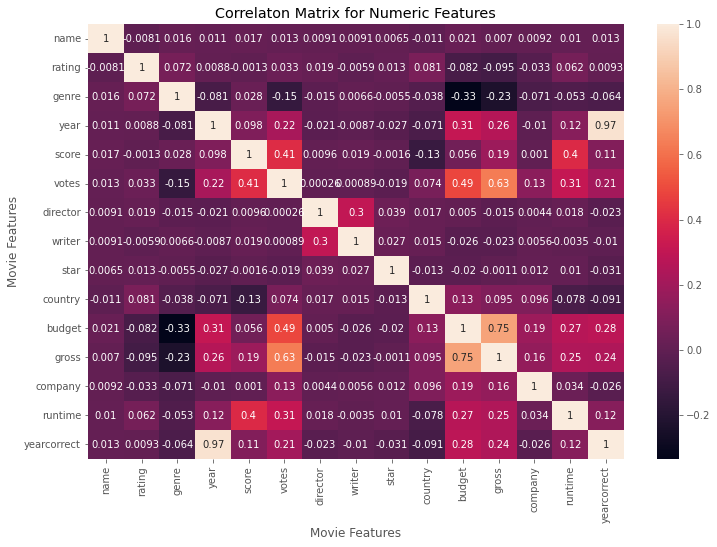

In [24]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlaton Matrix for Numeric Features')

plt.ylabel('Movie Features')

plt.xlabel('Movie Features')

plt.show()

In [25]:
df_numerized.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.012835
rating,-0.008069,1.000000,0.072423,0.008779,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.009280
genre,0.016355,0.072423,1.000000,-0.081261,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.063573
year,0.011453,0.008779,-0.081261,1.000000,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.967486
score,0.017097,-0.001314,0.027965,0.097995,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.107219
votes,0.013088,0.033225,-0.145307,0.222945,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.206475
director,0.009079,0.019483,-0.015258,-0.020795,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.022579
writer,0.009081,-0.005921,0.006567,-0.008656,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.010063
star,0.006472,0.013405,-0.005477,-0.027242,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.031166
country,-0.010737,0.081244,-0.037615,-0.070938,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.131720,0.095325,0.095548,-0.078412,-0.090962


In [26]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             score          0.017097
                              ...   
yearcorrect  budget         0.284783
             gross          0.243478
             company       -0.026492
             runtime        0.115317
             yearcorrect    1.000000
Length: 225, dtype: float64

In [27]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
             votes         -0.145307
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 225, dtype: float64

In [28]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        gross          0.632834
gross        votes          0.632834
budget       gross          0.750157
gross        budget         0.750157
yearcorrect  year           0.967486
year         yearcorrect    0.967486
name         name           1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [29]:
# Votes and budget have the highest correlation to gross earnings
# Company and gross have low correlation 